## Student Grade Prediction

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
sgp = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')

In [72]:
sgp

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [73]:
sgp.shape

(571, 43)

Observation:
    
1) So the data consists of 43 different columns in which Seat no. is kind of student idenfication column as CGPA is the final marks of student which he got aggregatly during 4 years. The CGPA is alos our target variable.

2) All the other columns shows us the grade got by students in different subjects during the 4 years of schooling.

In [74]:
sgp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

1) So, it can be that in most of the columns some of the values are missing which are to be filled by us.

2) There are 2 types of data in overall data which are float and object.

3) As Seat no. column is also a kind of indentification of student we will change the column to the index of our data set.

In [75]:
sgp.set_index(['Seat No.'], inplace = True)

In [76]:
sgp

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
CS-97002,A,D,D+,D,B-,C,D,A,D+,D,...,D+,D,C,D,A-,B-,C,C,B,2.008
CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,...,B,B,A,C,A,A,A,A-,A,3.608
CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97567,B,A,A,A-,A+,A,A-,A-,A+,B+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
CS-97568,A+,A,A,A,A,A,A,A-,A,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
CS-97569,B,A,A-,B+,A,A,A,A,A,B,...,A-,B,A,B+,A,C,B+,A-,A-,3.470


Now we will check the total null values in each column.

In [77]:
sgp.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

So, CS-412 is the column with highest no. values which are blank or null. We cannot drop this much of rows from our any column as in the end it will effect the prediction. Hence we will fill the Nan values in all the columns. But before filling them we will first convert the object data type in to int or float through encoding.

In [78]:
from sklearn.preprocessing import OrdinalEncoder

In [79]:
sgp.nunique()

PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

So highest no of unique values in the column is 14 these means there are total 14 types of different grades given. We will encode all the grade into int. format.

In [80]:
sgp['CS-107'].unique()

array(['C-', 'B+', 'B-', 'D', 'C', 'A-', 'C+', 'D+', 'B', 'A', nan, 'A+',
       'I', 'WU', 'F'], dtype=object)

In [81]:
oe = OrdinalEncoder()

for i in sgp.columns:
    if sgp[i].dtypes == 'object':
        sgp[i] = oe.fit_transform(sgp[i].values.reshape(-1,1))

In [82]:
sgp

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
CS-97002,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
CS-97003,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
CS-97004,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
CS-97005,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97567,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
CS-97568,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
CS-97569,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470


In [83]:
sgp.isnull().sum()

PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

We have changed our dtypes from string to integer so now, will will check the various attributes of the data and also fill the null values with mean of column.

In [84]:
sgp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, CS-97001 to CS-97571
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    float64
 1   HS-101     571 non-null    float64
 2   CY-105     570 non-null    float64
 3   HS-105/12  570 non-null    float64
 4   MT-111     569 non-null    float64
 5   CS-105     571 non-null    float64
 6   CS-106     569 non-null    float64
 7   EL-102     569 non-null    float64
 8   EE-119     569 non-null    float64
 9   ME-107     569 non-null    float64
 10  CS-107     569 non-null    float64
 11  HS-205/20  566 non-null    float64
 12  MT-222     566 non-null    float64
 13  EE-222     564 non-null    float64
 14  MT-224     564 non-null    float64
 15  CS-210     564 non-null    float64
 16  CS-211     566 non-null    float64
 17  CS-203     566 non-null    float64
 18  CS-214     565 non-null    float64
 19  EE-217     565 non-null    float64
 20  CS-

In [85]:
sgp.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,570.000000,570.000000,569.000000,571.000000,569.000000,569.000000,569.000000,569.000000,...,561.000000,559.000000,559.000000,559.000000,486.000000,558.000000,558.000000,557.000000,492.000000,571.000000
mean,3.781086,5.071804,2.903509,4.249123,3.903339,2.838879,4.130053,3.966608,3.892794,4.789104,...,4.126560,4.831843,3.506261,5.436494,3.156379,2.453405,3.899642,4.016158,3.217480,2.954888
std,3.046895,2.785317,2.964848,3.198370,2.991680,2.696709,2.729074,3.034533,2.659841,3.147403,...,3.366859,2.769584,2.969296,2.735501,2.638383,2.501091,2.393281,2.812758,2.471726,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,4.750000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


Observations:
    
1) Here we can see that standard deviation of all the columns are on higher side.

2) The mean and the median values are nearly same for every column.

3) No Negative data can be seen which is good for our data set..

4) The difference between the 75% and the maxmimum values of every column in on higher side which suggests of Outliers in data.

Here as number of columns is high we will use the PCA technique to reduce dimentionality of the data.

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [87]:
pca = PCA(n_components = 12)

In [88]:
sgpmean = sgp.mean()

In [89]:
sgpmean

PH-121       3.781086
HS-101       5.071804
CY-105       2.903509
HS-105/12    4.249123
MT-111       3.903339
CS-105       2.838879
CS-106       4.130053
EL-102       3.966608
EE-119       3.892794
ME-107       4.789104
CS-107       4.082601
HS-205/20    2.984099
MT-222       4.738516
EE-222       3.432624
MT-224       4.269504
CS-210       3.539007
CS-211       4.916961
CS-203       4.431095
CS-214       4.998230
EE-217       3.470796
CS-212       4.576991
CS-215       4.725664
MT-331       3.661922
EF-303       4.413547
HS-304       4.561497
CS-301       4.258467
CS-302       3.561497
TC-383       4.180036
MT-442       3.078431
EL-332       4.163701
CS-318       4.937722
CS-306       4.140569
CS-312       4.126560
CS-317       4.831843
CS-403       3.506261
CS-421       5.436494
CS-406       3.156379
CS-414       2.453405
CS-419       3.899642
CS-423       4.016158
CS-412       3.217480
CGPA         2.954888
dtype: float64

In [90]:
sgpf = sgp.fillna(sgpmean)

In [91]:
sgpf.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

We have filled the Nan values of all the columns with its mean and now we will reduce the dimensionality of data set.

In [92]:
sgpf

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
CS-97002,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
CS-97003,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
CS-97004,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
CS-97005,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97567,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
CS-97568,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
CS-97569,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470


In [93]:
x = sgpf.iloc[:,:-1]
y = sgpf.iloc[:,-1]

In [94]:
x.shape

(571, 41)

In [95]:
y.shape

(571,)

In [96]:
y

Seat No.
CS-97001    2.205
CS-97002    2.008
CS-97003    3.608
CS-97004    1.906
CS-97005    3.448
            ...  
CS-97567    3.798
CS-97568    3.772
CS-97569    3.470
CS-97570    2.193
CS-97571    1.753
Name: CGPA, Length: 571, dtype: float64

In [98]:
x.isnull().sum()

PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
dtype: int64

As we have separated our Target variable we will reduce the dimentionality of our independent columns.

In [102]:
xn = pca.fit_transform(x)

In [103]:
xn

array([[ 16.34520298,   2.48121224,  -8.49113602, ...,   0.05212844,
         -1.68787316,   0.88613217],
       [ 18.07690455,   3.96819089,  -1.11989818, ...,   5.55578639,
         -3.17259787,  -6.62211763],
       [-14.19062072,   3.75151514,  -0.29800815, ...,  -1.97587099,
         -0.16090899,   0.22855213],
       ...,
       [-10.56879819,  -3.95958607,   3.29094988, ...,  -0.82393699,
         -4.2417166 ,   0.15013911],
       [ 12.49161034,  -0.05392158,   3.01414812, ...,   2.77853007,
         -0.34262783,  -3.43667864],
       [ 20.52308996,  -3.70155585,   6.323674  , ...,   1.14688286,
          2.05781664,  -5.52649818]])

In [105]:
sgpn = pd.DataFrame(xn)

In [106]:
sgpn

,0,1,2,3,4,5,6,7,8,9,10,11
0,16.345203,2.481212,-8.491136,-1.385070,1.094082,-3.787365,1.168630,-2.726067,2.240041,0.052128,-1.687873,0.886132
1,18.076905,3.968191,-1.119898,1.111141,-4.731689,-2.497568,-0.243644,2.345433,-4.232252,5.555786,-3.172598,-6.622118
2,-14.190621,3.751515,-0.298008,-5.364003,2.430036,0.209549,2.713038,1.705791,1.397605,-1.975871,-0.160909,0.228552
3,23.085267,4.390228,-1.559857,-2.030552,-0.798915,3.434006,0.354730,4.752644,2.075906,-0.116482,4.023986,-2.365760
4,-9.052238,6.016552,-1.045852,-4.437439,-1.957457,-4.368835,-3.081361,2.545018,0.902827,-3.470190,-0.496958,1.972616
...,...,...,...,...,...,...,...,...,...,...,...,...
566,-18.171968,0.106197,-0.117135,0.088122,-1.002946,2.889440,2.614077,1.036700,-0.204086,-1.669926,1.403951,0.671104
567,-17.953377,-0.421916,2.938724,2.119752,0.761064,5.885476,-3.454216,1.702464,0.557438,1.226225,0.823122,2.617715
568,-10.568798,-3.959586,3.290950,1.078203,-4.155197,2.675000,-0.281780,-0.627275,-1.414819,-0.823937,-4.241717,0.150139
569,12.491610,-0.053922,3.014148,4.859498,-0.378768,-1.541391,-3.469377,2.339419,5.622044,2.778530,-0.342628,-3.436679


In [112]:
sgpn['CGPA'] = y

In [113]:
sgpn

,0,1,2,3,4,5,6,7,8,9,10,11,CGPA
0,16.345203,2.481212,-8.491136,-1.385070,1.094082,-3.787365,1.168630,-2.726067,2.240041,0.052128,-1.687873,0.886132,NaN
1,18.076905,3.968191,-1.119898,1.111141,-4.731689,-2.497568,-0.243644,2.345433,-4.232252,5.555786,-3.172598,-6.622118,NaN
2,-14.190621,3.751515,-0.298008,-5.364003,2.430036,0.209549,2.713038,1.705791,1.397605,-1.975871,-0.160909,0.228552,NaN
3,23.085267,4.390228,-1.559857,-2.030552,-0.798915,3.434006,0.354730,4.752644,2.075906,-0.116482,4.023986,-2.365760,NaN
4,-9.052238,6.016552,-1.045852,-4.437439,-1.957457,-4.368835,-3.081361,2.545018,0.902827,-3.470190,-0.496958,1.972616,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-18.171968,0.106197,-0.117135,0.088122,-1.002946,2.889440,2.614077,1.036700,-0.204086,-1.669926,1.403951,0.671104,NaN
567,-17.953377,-0.421916,2.938724,2.119752,0.761064,5.885476,-3.454216,1.702464,0.557438,1.226225,0.823122,2.617715,NaN
568,-10.568798,-3.959586,3.290950,1.078203,-4.155197,2.675000,-0.281780,-0.627275,-1.414819,-0.823937,-4.241717,0.150139,NaN
569,12.491610,-0.053922,3.014148,4.859498,-0.378768,-1.541391,-3.469377,2.339419,5.622044,2.778530,-0.342628,-3.436679,NaN


In [114]:
y

Seat No.
CS-97001    2.205
CS-97002    2.008
CS-97003    3.608
CS-97004    1.906
CS-97005    3.448
            ...  
CS-97567    3.798
CS-97568    3.772
CS-97569    3.470
CS-97570    2.193
CS-97571    1.753
Name: CGPA, Length: 571, dtype: float64

It seems the PCA technique is not working properly hence we will continue with the data frame in which we have filled our Nan values.

In [115]:
sgpf

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
CS-97002,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
CS-97003,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
CS-97004,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
CS-97005,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97567,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
CS-97568,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772
CS-97569,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,3.470


All the columns in the Data set are having categorical values so we cannot remove the skewness and hence we will go ahead and check the ouliers in the data.

In [116]:
from scipy.stats import zscore

In [117]:
Z = np.abs(zscore(sgpf))
Z

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,0.400402,1.770900,1.721991,0.548389,1.372963,2.657832,1.789175,1.332669,0.417365,1.022864,...,1.161705,1.157159,1.530930,0.947978,0.475565,0.993185,1.734677,0.366108,0.531176,1.209480
CS-97002,1.242052,1.411559,2.397746,1.488014,0.367537,1.173242,1.789175,1.310604,2.302135,1.341424,...,1.761537,1.522406,0.849569,1.317776,0.475565,1.030910,0.888567,0.714752,0.094885,1.527217
CS-97003,1.242052,0.744483,0.981031,0.235181,0.032395,1.053643,0.319611,0.011033,0.713496,0.888497,...,0.337873,0.669075,1.194515,0.208383,1.298071,0.993185,1.649763,0.726395,1.403760,1.053392
CS-97004,1.714365,0.692879,2.397746,1.488014,1.708105,0.311348,2.156566,1.332669,1.925181,0.704303,...,1.761537,0.426666,2.212291,0.947978,0.758195,0.221272,1.311622,1.075039,1.650282,1.691731
CS-97005,0.585070,1.103823,0.305275,0.078027,1.308173,1.053643,0.782562,0.011033,1.467404,0.888497,...,0.261958,0.303828,0.168207,0.161414,0.475565,0.993185,0.803653,0.726395,1.403760,0.795331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97567,0.256579,1.822504,0.981031,0.704444,0.973031,1.053643,0.782562,0.649785,1.090450,0.251377,...,0.637789,1.034321,1.194515,2.010402,1.298071,0.626091,0.042457,0.366108,1.403760,1.359839
CS-97568,0.913561,1.822504,0.981031,1.330861,1.308173,1.053643,1.517344,0.649785,1.467404,1.525618,...,0.037957,0.303828,1.194515,2.010402,0.475565,0.221272,0.803653,0.714752,0.531176,1.317904
CS-97569,0.256579,1.822504,0.305275,0.078027,1.308173,1.053643,1.517344,1.310604,1.467404,0.569937,...,0.637789,0.669075,1.194515,0.531212,1.298071,1.435729,0.042457,0.726395,0.531176,0.830814


In [118]:
thershold = 3
print(np.where(Z >3))

(array([ 60,  60,  60,  91, 137, 143, 143, 281, 281, 281, 288, 288, 340,
       340, 352, 352, 382, 387, 387, 410, 423, 424, 432, 446, 447, 447,
       453, 453, 454, 454, 454, 509, 513, 516, 516, 521, 522, 522, 527,
       543, 543, 550, 550, 557, 560, 563, 565, 570], dtype=int64), array([ 2, 11, 19, 15,  2,  2, 41, 11, 15, 41, 11, 41, 24, 37, 24, 37, 37,
       37, 40, 37, 37, 37, 40, 36, 36, 37, 36, 40, 36, 37, 38, 36, 40, 36,
       40, 36, 36, 40, 40, 36, 40, 37, 40, 37, 37, 38, 41, 36],
      dtype=int64))


In [119]:
sgp3 = sgpf[(Z<3).all(axis =1)]

In [120]:
sgp3

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,2.205
CS-97002,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,2.008
CS-97003,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,3.608
CS-97004,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,1.906
CS-97005,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97565,2.0,9.0,0.0,6.0,4.0,4.0,6.0,2.0,5.0,9.0,...,3.0,7.0,4.0,10.0,6.0,8.0,3.0,6.0,5.0,2.607
CS-97567,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,3.798
CS-97568,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,3.772


So After removing the ouliers from the data we have lost 31 rows from our data set.

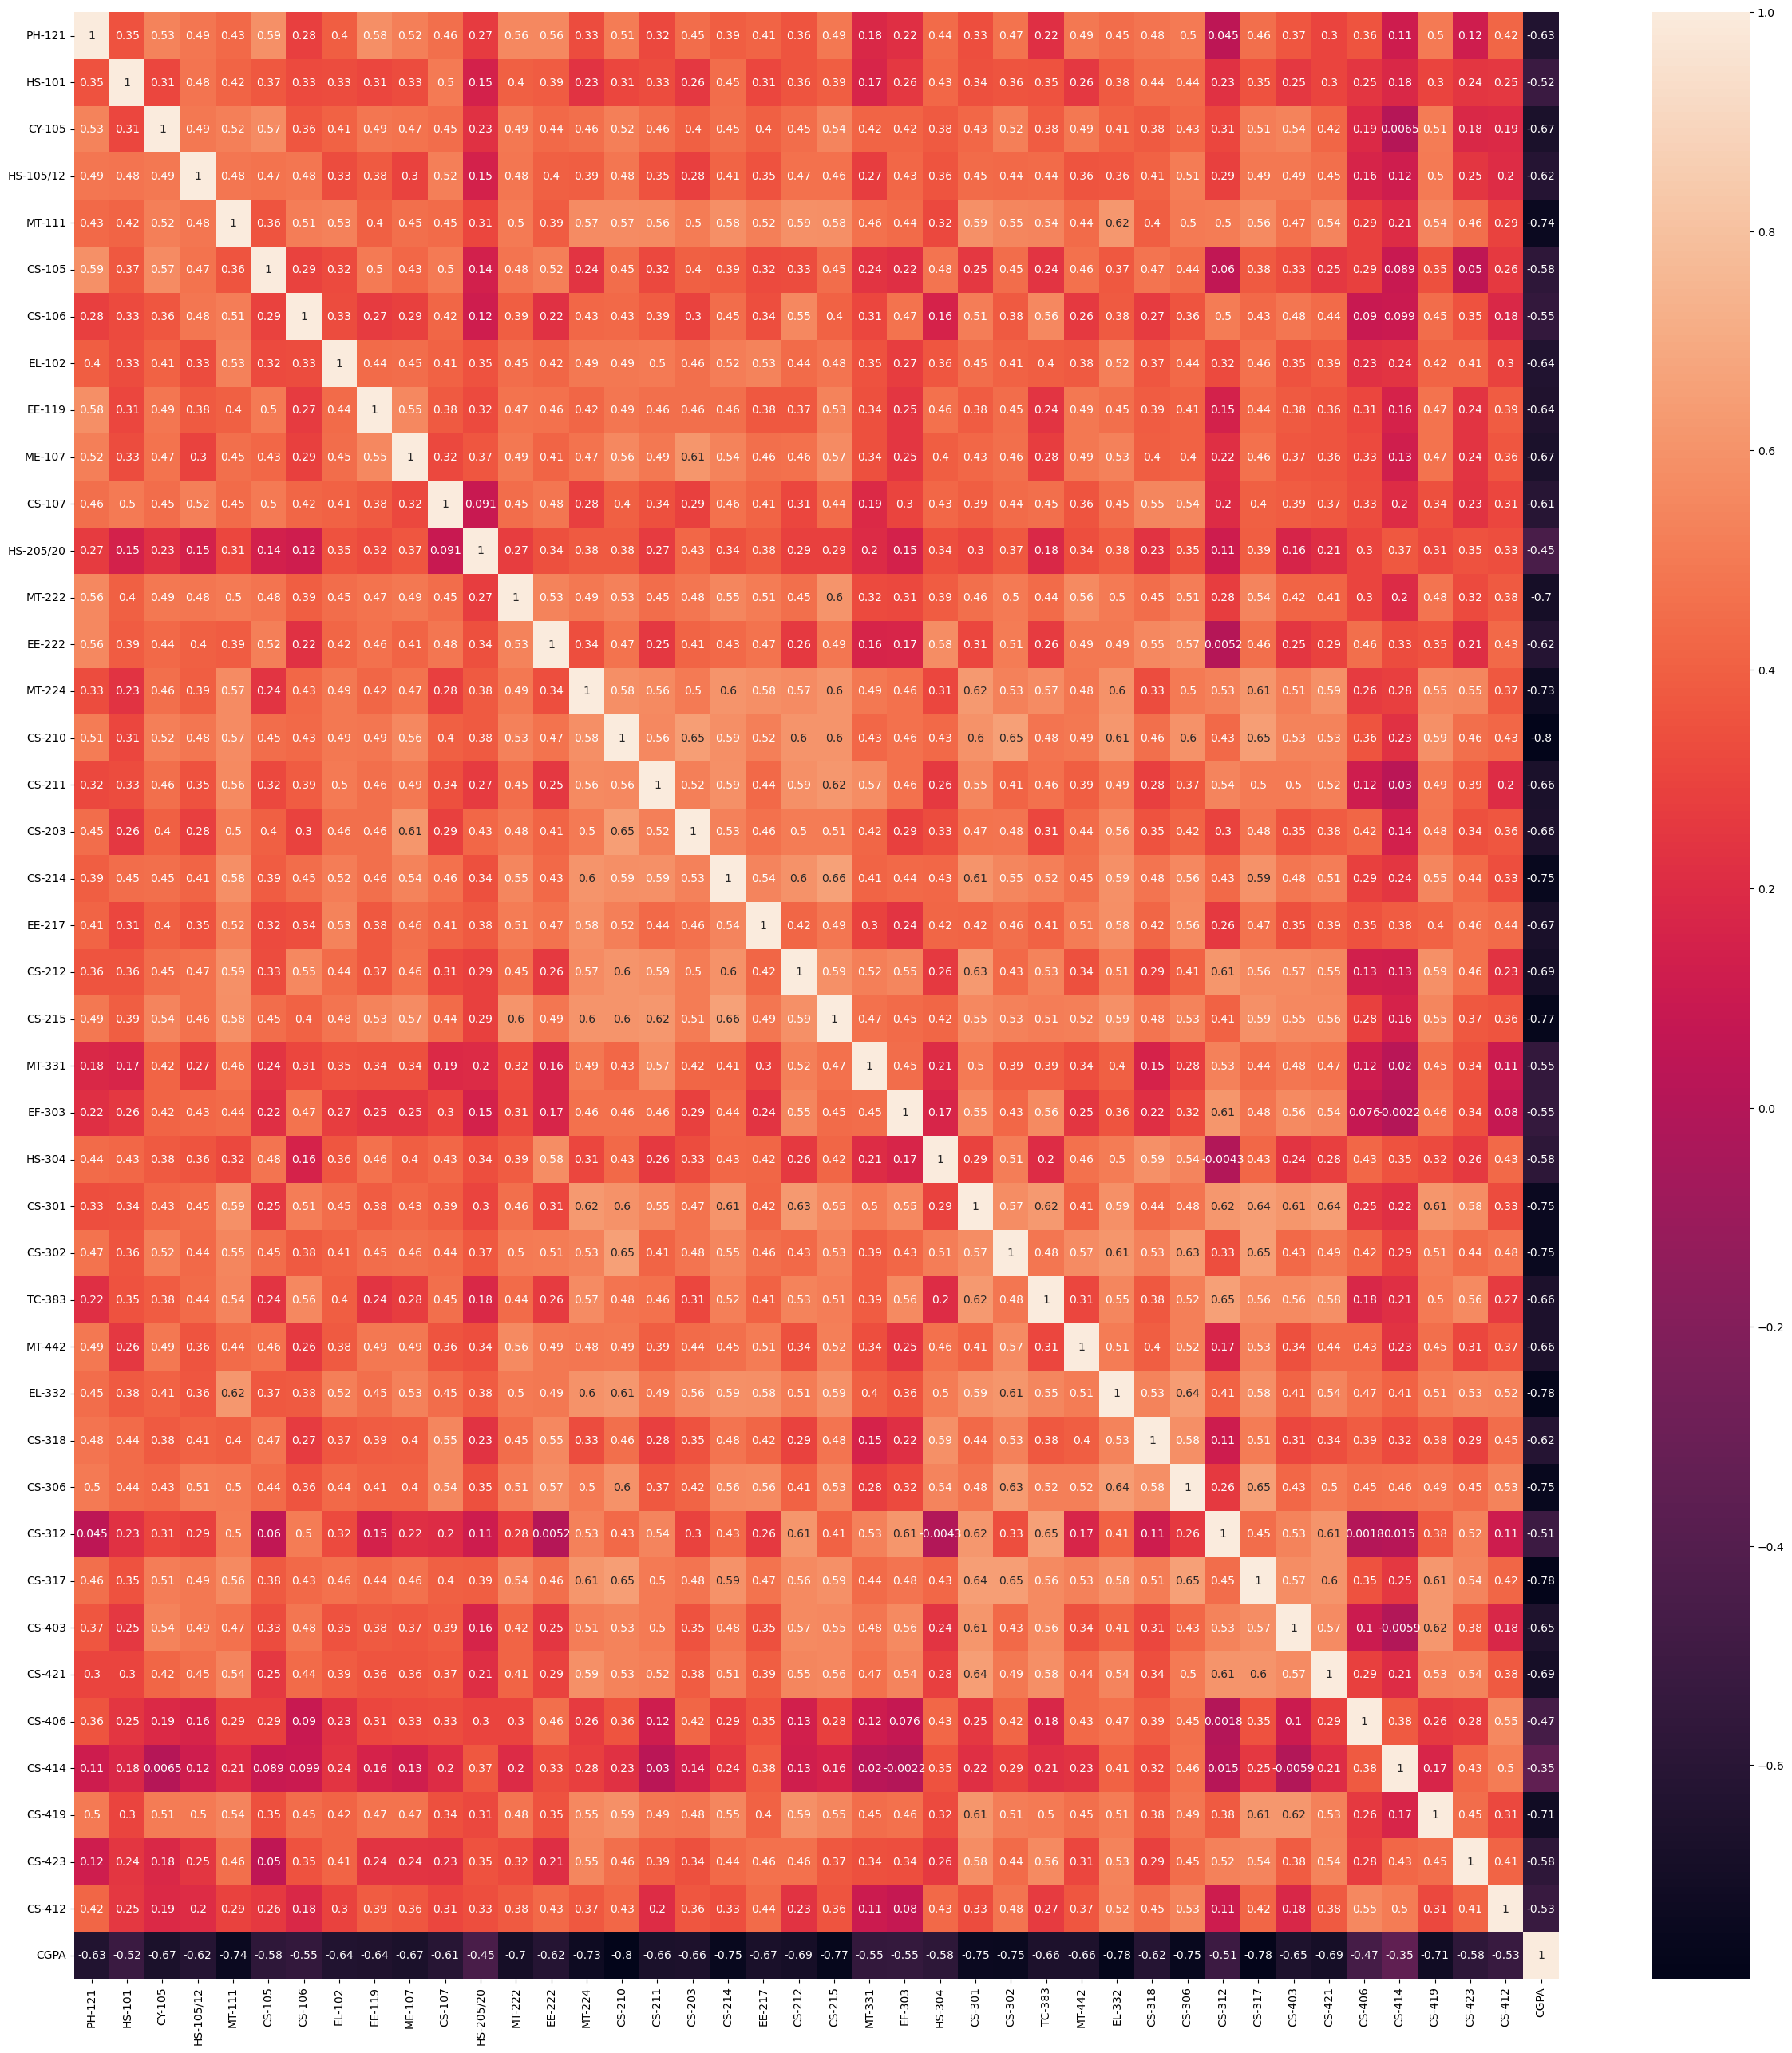

In [134]:
plt.figure(figsize = (30,32))
sns.heatmap(sgp3.corr(), annot = True)
plt.show()

Now we will separate the independent variables and target variable from the data set and we will use Standard Scaler technique on independent variables to standardize the data.

In [121]:
x = sgp3.iloc[:,:-1]
y = sgp3.iloc[:,-1]

In [122]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
Seat No.,,,,,,,,,,,,,,,,,,,,,
CS-97001,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,6.0,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0
CS-97002,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,9.0,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0
CS-97003,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0
CS-97004,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0
CS-97005,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS-97565,2.0,9.0,0.0,6.0,4.0,4.0,6.0,2.0,5.0,9.0,...,8.0,3.0,7.0,4.0,10.0,6.0,8.0,3.0,6.0,5.0
CS-97567,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,4.0,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0
CS-97568,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0


In [123]:
x.shape

(540, 41)

In [124]:
y

Seat No.
CS-97001    2.205
CS-97002    2.008
CS-97003    3.608
CS-97004    1.906
CS-97005    3.448
            ...  
CS-97565    2.607
CS-97567    3.798
CS-97568    3.772
CS-97569    3.470
CS-97570    2.193
Name: CGPA, Length: 540, dtype: float64

In [125]:
y.shape

(540,)

In [127]:
sc = StandardScaler()

x1 = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

In [128]:
x1

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0.465432,1.859787,1.846654,0.609464,1.474494,2.811932,1.863728,1.417366,0.479089,1.081167,...,0.751807,1.209267,1.229797,1.525431,1.057689,-0.430416,-1.050897,1.818915,-0.328418,-0.502686
1,-1.219108,1.492052,2.554612,1.571073,0.436432,1.271147,1.863728,-1.289500,2.412323,1.404223,...,1.850306,1.815411,1.601073,0.850786,1.442610,-0.430416,1.377848,0.954481,0.772888,0.008933
2,-1.219108,-0.714360,-0.985178,0.288928,0.090412,-1.040030,0.366017,0.063933,-0.680851,-0.857169,...,-0.712859,-0.306091,-0.626581,-1.173148,0.287848,-1.385159,-1.050897,-1.638822,-0.695521,-1.525924
3,1.813064,0.756581,2.554612,1.571073,1.820514,-0.269637,2.238156,1.417366,2.025676,0.758111,...,1.484139,1.815411,0.487246,2.200076,1.057689,1.001697,0.406350,1.386698,1.139990,2.055410
4,-0.545292,-1.082095,-0.277220,-0.031608,-1.293670,-1.040030,-0.757267,0.063933,-1.454145,-0.857169,...,-0.712859,0.300052,-0.255305,0.176142,-0.097073,-0.430416,-1.050897,-0.774388,-0.695521,-1.525924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,-0.545292,1.492052,-0.985178,0.609464,0.090412,0.500755,0.740445,-0.612783,0.479089,1.404223,...,1.484139,-0.306091,0.858522,0.176142,1.827531,1.479069,2.835095,-0.342170,0.772888,1.032172
536,-0.208384,-1.817565,-0.985178,-0.672680,-0.947650,-1.040030,-0.757267,-0.612783,-1.067498,-0.211057,...,0.019474,-0.609163,-0.997856,-1.173148,-2.021677,-1.385159,0.892099,0.090047,-0.328418,-1.525924
537,-0.882200,-1.817565,-0.985178,-1.313752,-1.293670,-1.040030,-1.506122,-0.612783,-1.454145,-1.503281,...,-0.712859,-0.003019,-0.255305,-1.173148,-2.021677,-0.430416,0.406350,-0.774388,0.772888,-0.502686
538,-0.208384,-1.817565,-0.277220,-0.031608,-1.293670,-1.040030,-1.506122,-1.289500,-1.454145,-0.534113,...,0.019474,-0.609163,-0.626581,-1.173148,-0.481994,-1.385159,1.863597,0.090047,-0.695521,-0.502686


We will check the variance inflation factor of the columns

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = variance_inflation_factor

vif = pd.DataFrame()

vif['Values'] = [var(x1.values,i) for i in range (len(x1.columns))]
vif['Features'] = x1.columns

In [136]:
vif

,Values,Features
0,2.814544,PH-121
1,1.816948,HS-101
2,2.474571,CY-105
3,2.331603,HS-105/12
4,2.649847,MT-111
5,2.374574,CS-105
6,1.976167,CS-106
7,1.926500,EL-102
8,2.174273,EE-119
9,2.328119,ME-107


So, Variance inflation factor for every column seems to be in limit hence we will go forward & check the best random state for our models.

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [140]:
maxacc = 0
maxrs = 0

for i in range(0,200):
    lr = LinearRegression()
    x_train,x_test,y_train,y_test = train_test_split(x1,y, test_size = 0.30, random_state = i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > maxacc:
        maxacc = acc
        maxrs = i
        
print('The best score is', maxacc.round(2),'on random state', maxrs)

The best score is 0.99 on random state 22


So Our best random state would would be 22. Now we will import various regression models.

In [143]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [144]:
x_train,x_test,y_train,y_test = train_test_split(x1,y, test_size = 0.30, random_state = maxrs)

In [146]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lrpred = lr.predict(x_test)
lracc = r2_score(y_test, lrpred)
lrmse = mean_squared_error(y_test, lrpred)
lrmae = mean_absolute_error(y_test, lrpred)

print('The Score for Logistic Regression is ', lracc.round(2))
print('The mean squared error is', lrmse)
print('The mean absolute error is', lrmae)

The Score for Logistic Regression is  0.99
The mean squared error is 0.0028748196047644996
The mean absolute error is 0.043341780554677994


In [162]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred = dtr.predict(x_test)
dtracc = r2_score(y_test,dtrpred)
dtrmse = mean_squared_error(y_test, dtrpred)
dtrmae = mean_absolute_error(y_test, dtrpred)

print('The score for Decision Tree Regressor is',dtracc.round(2))
print('The mean squared error is',dtrmse)
print('The mean absolute error is', dtrmae)

The score for Decision Tree Regressor is 0.82
The mean squared error is 0.05615179629629631
The mean absolute error is 0.1832530864197531


In [148]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfrpred = rfr.predict(x_test)
rfracc = r2_score(y_test, rfrpred)
rfrmse = mean_squared_error(y_test, rfrpred)
rfrmae = mean_absolute_error(y_test, rfrpred)

print('The score for Random Forest Regressor is ', rfracc.round(2))
print('The mean squared error is',rfrmse )
print('The mean absolute error is', rfrmae)

The score for Random Forest Regressor is  0.96
The mean squared error is 0.011537749988888865
The mean absolute error is 0.07974024691358016


In [149]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbrpred = gbr.predict(x_test)
gbracc = r2_score(y_test, gbrpred)
gbrmse = mean_squared_error(y_test, gbrpred)
gbrmae = mean_absolute_error(y_test, gbrpred)

print('The Score for Gradient Boosting Regressor is', gbracc.round(2))
print('The mean sqaured error is', gbrmse)
print('The mean absolute error is', gbrmae)

The Score for Gradient Boosting Regressor is 0.96
The mean sqaured error is 0.011721950624985414
The mean absolute error is 0.08078973252228375


In [151]:
svr = SVR()
svr.fit(x_train, y_train)
svrpred = svr.predict(x_test)
svracc = r2_score(y_test, svrpred)
svrmse = mean_squared_error(y_test, svrpred)
svrmae = mean_absolute_error(y_test, svrpred)

print('The score for Support Vector Regressor is', svracc.round(2))
print('The mean sqaured error is', svrmse)
print('The mean absolute error is',svrmae)

The score for Support Vector Regressor is 0.97
The mean sqaured error is 0.009059801696748075
The mean absolute error is 0.07356668866005413


In [153]:
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
knrpred = knr.predict(x_test)
knracc = r2_score(y_test, knrpred)
knrmse = mean_squared_error(y_test, knrpred)
knrmae = mean_absolute_error(y_test, knrpred)

print('The score for KNeighbors Regressors is', knracc.round(2))
print('The mean squared error is', knrmse)
print('The mean absolute error is', knrmae)

The score for KNeighbors Regressors is 0.97
The mean squared error is 0.009680737283950618
The mean absolute error is 0.07918765432098765


In [154]:
la = Lasso()
la.fit(x_train, y_train)
lapred = la.predict(x_test)
laacc = r2_score(y_test, lapred)
lamse = mean_squared_error(y_test, lapred)
lamae = mean_absolute_error(y_test, lapred)

print('The score for Lasso', laacc.round(2))
print('The mean squared error is', lamse)
print('The mean absolute error is', lamae)

The score for Lasso -0.02
The mean squared error is 0.3198725312701211
The mean absolute error is 0.47496926644457493


In [156]:
ri = Ridge()
ri.fit(x_train,y_train)
ripred = ri.predict(x_test)
riacc = r2_score(y_test, ripred)
rimse = mean_squared_error(y_test, ripred)
rimae = mean_absolute_error(y_test, ripred)

print('The Score for Ridge is', riacc.round(2))
print('The mean squared error is', rimse)
print('The mean absolute error is ', rimae)

The Score for Ridge is 0.99
The mean squared error is 0.002871532237444934
The mean absolute error is  0.043318703634445836


In [157]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
etrpred = etr.predict(x_test)
etracc = r2_score(y_test, etrpred)
etrmse = mean_squared_error(y_test, etrpred)
etrmae = mean_absolute_error(y_test, etrpred)

print('The score from Extra Trees Regressor is', etracc.round(2))
print('The mean squared error is ', etrmse)
print('The mean absolute error is', etrmae)

The score from Extra Trees Regressor is 0.97
The mean squared error is  0.008480951474074037
The mean absolute error is 0.07108283950617268


So the highest score and less error can be Liner Regression and Ridge. We will check the cross val score of all models as well.

In [166]:
from sklearn.model_selection import cross_val_score as cvs

In [167]:
s = cvs(lr,x1,y)
print(s)
print(s.mean())
print(lracc)

print('The difference between score and cross val score of Linear Regression is', lracc - s.mean() )

[0.94535768 0.99134818 0.97877818 0.98306942 0.98135796]
0.975982282946562
0.9908199471309737
The difference between score and cross val score of Linear Regression is 0.01483766418441168


In [168]:
s1 = cvs(dtr, x1,y)
print(s1)
print(s1.mean())
print(dtracc)

print('The difference between score and cross val score of Decision tree regressor is', dtracc - s1.mean())

[0.81452506 0.78154542 0.80710768 0.70841714 0.81487783]
0.7852946278701493
0.8206925896023223
The difference between score and cross val score of Decision tree regressor is 0.03539796173217302


In [169]:
s2 = cvs(rfr, x1, y)
print(s2)
print(s2.mean())
print(rfracc)

print('The difference between score and cross val score of Random Forest Regressor is', rfracc - s2.mean())

[0.90331838 0.94935846 0.94568025 0.94380491 0.92611036]
0.9336544715703938
0.9631569387129303
The difference between score and cross val score of Random Forest Regressor is 0.02950246714253646


In [170]:
s3 = cvs(gbr,x1,y)
print(s3)
print(s3.mean())
print(gbracc)

print('The difference between score and cross val score of Gradient Boosting Regressor is', gbracc - s3.mean())

[0.91529955 0.97246192 0.96480671 0.9617119  0.93937008]
0.9507300320671389
0.9625687377784883
The difference between score and cross val score of Gradient Boosting Regressor is 0.011838705711349373


In [172]:
s4 = cvs(svr,x1,y)
print(s4)
print(s4.mean())
print(svracc)

print('The difference between score and cross val score of Support Vector Regressor is', svracc - s4.mean())

[0.91706478 0.97400635 0.96213732 0.96062393 0.9548904 ]
0.9537445562126271
0.971069677408209
The difference between score and cross val score of Support Vector Regressor is 0.01732512119558194


In [173]:
s5 = cvs(knr,x1,y)
print(s5)
print(s5.mean())
print(knracc)

print('The difference between score and cross val score of KNeighbors Regressor is', knracc - s5.mean())

[0.91756422 0.96759135 0.95734843 0.94935957 0.92670712]
0.9437141363915043
0.9690868672488056
The difference between score and cross val score of KNeighbors Regressor is 0.025372730857301296


In [174]:
s6 = cvs(ri,x1,y)
print(s6)
print(s6.mean())
print(riacc)

print('The difference between score and cross val score of Ridge is', riacc - s6.mean())

[0.94538339 0.99138569 0.97883481 0.98311947 0.98140475]
0.9760256217279754
0.9908304445568794
The difference between score and cross val score of Ridge is 0.014804822828904052


In [175]:
s7 = cvs(etr,x1,y)
print(s7)
print(s7.mean())
print(etracc)

print('The difference between score and cross val score of Extra Trees Regressor is', etracc - s7.mean())

[0.90587218 0.96395125 0.95947577 0.96332643 0.94317682]
0.9471604913677508
0.9729180979625244
The difference between score and cross val score of Extra Trees Regressor is 0.025757606594773552


So after seeing cross validation score of all models there is not much difference hence we will go ahead with Linear Regression which is having highest score, least mean and good cross val score.

In [179]:
lr = pd.DataFrame()

In [180]:
lr['Original'] = y_test
lr['Prediced'] = lrpred

In [181]:
lr

,Original,Prediced
Seat No.,,
CS-97029,3.195,3.151402
CS-97416,1.951,1.993592
CS-97336,1.936,1.941919
CS-97031,3.443,3.505449
CS-97533,3.068,3.037169
...,...,...
CS-97157,3.662,3.598903
CS-97556,2.206,2.127344
CS-97129,3.030,3.142440


<AxesSubplot:xlabel='Original', ylabel='Prediced'>

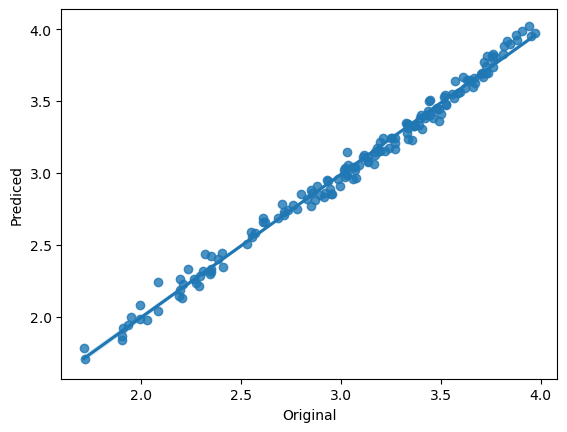

In [184]:
sns.regplot(x= 'Original', y= 'Prediced', data = lr)

From above graph it can be seen that the predicted and the original values are near the best regression line, hence we can go ahead with this model. Before saving it we will try hyper parameter boosting.

In [185]:
from sklearn.model_selection import GridSearchCV

In [186]:
param_grid ={ 'fit_intercept': [True, False],  
    'normalize': [True, False],     
    'copy_X': [True, False]}

gscv = GridSearchCV(LinearRegression(), param_grid,cv = 5)

In [187]:
gscv.fit(x_train, y_train)

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline imp

C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in ve

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [188]:
gscv.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [189]:
fm = LinearRegression(copy_X = True, fit_intercept = True, normalize = True)

In [191]:
fm.fit(x_train, y_train)
fmpred = fm.predict(x_test)
fmacc = r2_score(y_test, fmpred)
fmmse = mean_squared_error(y_test, fmpred)
fmmae = mean_absolute_error(y_test, fmpred)

print('The Score of Final Model is', fmacc.round(2))
print('The mean squared error is', fmmse.round(2))
print('The mean absolute error is', fmmae.round(2))

The Score of Final Model is 0.99
The mean squared error is 0.0
The mean absolute error is 0.04


C:\Users\Kushal Kulkarni\anaconda3new\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [192]:
import joblib

In [193]:
joblib.dump(fm,'Student Grade Preiction.txt')

['Student Grade Preiction.txt']

In [194]:
m = joblib.load('Student Grade Preiction.txt')

In [195]:
predi = m.predict(x_test)
predi

array([3.1514022 , 1.99359163, 1.94191868, 3.50544914, 3.03716896,
       3.74313402, 3.56068757, 3.66997716, 1.97375561, 2.32748499,
       1.86359909, 2.24014197, 1.98376198, 2.08314456, 3.40547619,
       3.52968799, 3.32687467, 3.33927035, 3.97233151, 4.02241591,
       2.96090042, 1.77906774, 2.58115851, 2.04034957, 3.82851332,
       3.58770319, 3.92620127, 2.68548874, 3.54421451, 3.62564991,
       2.8528835 , 3.51732919, 3.27557117, 3.04083937, 3.32345079,
       3.54891696, 3.44763521, 2.81962822, 3.33664559, 3.17420967,
       3.89877347, 3.44458353, 2.7791777 , 3.2351003 , 3.31033722,
       2.83167245, 2.5904586 , 3.16540083, 3.47318513, 3.95325644,
       2.85146214, 2.8610177 , 2.90960843, 3.38347112, 3.0574893 ,
       3.16204173, 3.42899175, 3.33100895, 3.69386631, 3.82526069,
       3.30778323, 2.18746454, 3.07261734, 3.64294523, 2.85722271,
       3.35002518, 3.66913684, 1.70290567, 3.81299516, 3.24130706,
       2.22307892, 2.43364274, 3.12598451, 2.95017911, 3.01879

In [196]:
A = np.array(y_test)

In [197]:
df = pd.DataFrame()

df['Predicted'] = predi
df['Original'] = A

In [199]:
df

,Predicted,Original
0,3.151402,3.195
1,1.993592,1.951
2,1.941919,1.936
3,3.505449,3.443
4,3.037169,3.068
...,...,...
157,3.598903,3.662
158,2.127344,2.206
159,3.142440,3.030
160,3.499573,3.440
